# Packages

In [1]:
import numpy as np
import pandas as pd #for loading csv Excel files
import itertools #to merge lists
from scipy.interpolate import interp1d
import matplotlib.pyplot as pl #for plots
from matplotlib import rc, rcParams
import time
from scipy.optimize import curve_fit

# Options for plotting

In [2]:
fontsize=26
legendfontsize=12
font = {'size' : fontsize}
rc('font',**font)
rc('text', usetex=True)
#rc('font', family='serif', serif='Computer Modern Roman')

In [3]:
#Color palette accessible to colorblind people (see https://davidmathlogic.com/colorblind/)
lightblue='#1A85FF'
blue='#005AB5'
darkblue='#222255'
purple='#5D3A9B'
magenta='#AA4499'
red='#DC3220'
orange='#E66100'
yellow='#FFC20A'
green='#40B0A6'

colors=[lightblue,blue,darkblue,purple,magenta,red,orange,yellow,green]

# Constants

In [4]:
c=2.99792458*10.**8.*10.**(-3.) #km/s (not m/s)
GeV_to_cmminus1=5.06*10.**13.
GeV_to_g=1.78*10.**(-24.)

# Effective Range Parameterization of The Hulthén Potential

In [52]:
from scipy.special import polygamma, zeta, psi

$(a, r_e)$ parameterisation of Hulthen potential:

In [56]:
def sigma_Hulthen(alphaX, mX, mPhi, v):
    a = -alphaX*mX/mPhi**2
    r = 4/(mX*alphaX)
    #print(a/5.068) #converting to fm
    #print(r/5.068) #converting to fm
    #print(r/a)
    prefactor = 4*np.pi*a**2
    term1 = (1 - 1/8*(r/a)*(mX*a*v/c)**2)**2
    term2 = 1/4*(mX*a*v/c)**2
    return prefactor*(term1 + term2)**(-1)*(5.068*10**13)**(-2)
def sigma_over_m_Hulthen(alphaX, mX, mPhi, v):
    return sigma_Hulthen(alphaX,mX,mPhi,v)/(mX*GeV_to_g)

Text(0.5, 1.0, 'Repulsive Case')

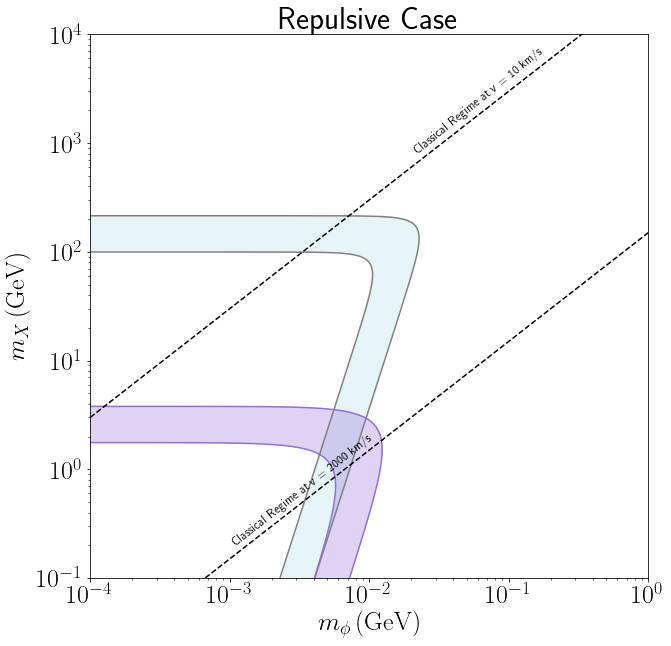

In [63]:
alphaX = -10**(-3);
mXrange = np.logspace(-1,4,500);
mPhirange = np.logspace(-4,0,500);
MPhi, MX = np.meshgrid(mPhirange, mXrange)


sigma_vals_dwarvesH = sigma_over_m_Hulthen(alphaX,MX,MPhi, 10)
sigma_vals_clusterH = sigma_over_m_Hulthen(alphaX, MX, MPhi, 2000)
Classical_Regime_Dwarves = 10/c*MX/MPhi;
ClassicalRegim_Clusters = 2000/c*MX/MPhi;

ax, fig = pl.subplots(figsize=(10,10))
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$m_\phi\,\mathrm{(GeV)}$')
pl.ylabel(r'$m_X\,\mathrm{(GeV)}$')
CS1 = pl.contour(MPhi, MX, sigma_vals_dwarvesH, [1,10], colors = ('grey','grey'))
CS01 = pl.contourf(MPhi, MX, sigma_vals_dwarvesH,[1,10], colors = ('lightblue'), alpha=0.3)
CS2 = pl.contour(MPhi,MX, sigma_vals_clusterH, [0.1,1],colors = ('mediumpurple','mediumpurple'))
CS02 = pl.contourf(MPhi, MX, sigma_vals_clusterH,[0.1,1], colors = ('mediumpurple'), alpha = 0.3)
CS_Classical = pl.contour(MPhi,MX, Classical_Regime_Dwarves,[1], colors = ('black'), linestyles=('dashed'))
CS_Classical_Cl = pl.contour(MPhi,MX, ClassicalRegim_Clusters, [1], colors = ('black'), linestyles = ('dashed'))
pl.text(0.02,800,'Classical Regime at v = 10 km/s', rotation = 39, fontsize = 12)
pl.text(0.001,0.2,'Classical Regime at v = 2000 km/s', rotation = 38, fontsize = 12)
pl.title('Repulsive Case')

In [64]:
def a_Hulthen(alphaX, mX, mPhi):
    delta = zeta(2)*mPhi
    eta = (alphaX*mX/delta)**0.5
    gamma = 0.5772 #Euler-Mascheroni Constant
    a = (polygamma(0,1+eta) + polygamma(0,1-eta) + 2*gamma)/delta #dimensions of [GeV]^-1
    return a

def r_Hulthen(alphaX, mX, mPhi):
    delta = zeta(2)*mPhi
    eta = (alphaX*mX/delta)**0.5
    gamma = 0.5772 #Euler-Mascheroni Constant    
    term1 = 2*a_Hulthen(alphaX, mX, mPhi)/3 
    term2 = (3*delta*eta*(polygamma(0,1+eta)+polygamma(0,1-eta)+2*gamma)**2)**(-1)
    term3 = 3*(polygamma(1,1+eta)-polygamma(1,1-eta)) + eta*(polygamma(2,1+eta)+polygamma(2,1-eta)+16*zeta(3))
    r = term1 - term2*term3 #dimensions of [GeV]^-1
    return r

def sigma_Hulthen(alphaX, mX, mPhi, v):
    a = a_Hulthen(alphaX,mX,mPhi)
    r = r_Hulthen(alphaX, mX, mPhi)
    #print(a/5.068) #converting to fm
    #print(r/5.068) #converting to fm
    #print(r/a)
    prefactor = 4*np.pi*a**2
    term1 = (1 - 1/8*(r/a)*(mX*a*v/c)**2)**2
    term2 = 1/4*(mX*a*v/c)**2
    return prefactor*(term1 + term2)**(-1)*(5.068*10**13)**(-2)
def sigma_over_m_Hulthen(alphaX, mX, mPhi, v):
    return sigma_Hulthen(alphaX,mX,mPhi,v)/(mX*GeV_to_g)

In [65]:
alphaX = 10**(-2);
mXrange = np.logspace(-1,4,500);
mPhirange = np.logspace(-4,0,500);
MPhi, MX = np.meshgrid(mPhirange, mXrange)

In [66]:


sigma_vals_dwarvesH = sigma_over_m_Hulthen(10**(-2),MX,MPhi, 10)
sigma_vals_clusterH = sigma_over_m_Hulthen(10**(-2), MX, MPhi, 2000)

Text(0.5, 1.0, 'Attractive case')

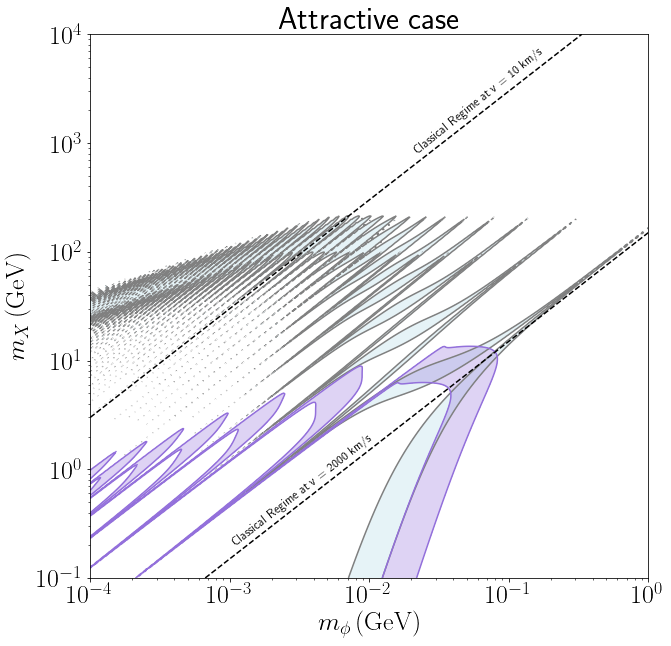

In [67]:
Classical_Regime_Dwarves = 10/c*MX/MPhi;
ClassicalRegim_Clusters = 2000/c*MX/MPhi;

ax, fig = pl.subplots(figsize=(10,10))
pl.xscale('log')
pl.yscale('log')
pl.xlabel(r'$m_\phi\,\mathrm{(GeV)}$')
pl.ylabel(r'$m_X\,\mathrm{(GeV)}$')
CS1 = pl.contour(MPhi, MX, sigma_vals_dwarvesH, [1,10], colors = ('grey','grey'))
CS01 = pl.contourf(MPhi, MX, sigma_vals_dwarvesH,[1,10], colors = ('lightblue'), alpha=0.3)
CS2 = pl.contour(MPhi,MX, sigma_vals_clusterH, [0.1,1],colors = ('mediumpurple','mediumpurple'))
CS02 = pl.contourf(MPhi, MX, sigma_vals_clusterH,[0.1,1], colors = ('mediumpurple'), alpha = 0.3)
CS_Classical = pl.contour(MPhi,MX, Classical_Regime_Dwarves,[1], colors = ('black'), linestyles=('dashed'))
CS_Classical_Cl = pl.contour(MPhi,MX, ClassicalRegim_Clusters, [1], colors = ('black'), linestyles = ('dashed'))
pl.text(0.02,800,'Classical Regime at v = 10 km/s', rotation = 39, fontsize = 12)
pl.text(0.001,0.2,'Classical Regime at v = 2000 km/s', rotation = 38, fontsize = 12)
pl.title('Attractive case')

In [23]:
10/c 

3.3356409519815205e-05